# Match Analysis

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Cleaning and Exploration

In [51]:
matches = pd.read_csv("matches.csv" , index_col = "id")
matches = matches.iloc[:,:-3]

In [52]:
matches.shape

(756, 14)

In [53]:
matches.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

### Taking in consideration only KXIP VS MI Matches

In [54]:
KM =matches[np.logical_or(np.logical_and(matches['team1']=='Kings XI Punjab',matches['team2']=='Mumbai Indians'),
                            np.logical_and(matches['team2']=='Kings XI Punjab',matches['team1']=='Mumbai Indians'))]

In [55]:
KM.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
22,2017,Indore,2017-04-20,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,JC Buttler,Holkar Cricket Stadium
50,2017,Mumbai,2017-05-11,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,7,0,WP Saha,Wankhede Stadium
69,2008,Chandigarh,2008-04-25,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,66,0,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali"
106,2008,Mumbai,2008-05-21,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,1,0,SE Marsh,Wankhede Stadium
135,2009,Durban,2009-04-29,Kings XI Punjab,Mumbai Indians,Kings XI Punjab,bat,normal,0,Kings XI Punjab,3,0,KC Sangakkara,Kingsmead


In [56]:
KM.shape

(24, 14)

In [60]:
KM.season.unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [61]:
KM.isnull().sum()

season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
dtype: int64

In [62]:
KM.describe().iloc[:,2:].T

,count,mean,std,min,25%,50%,75%,max
win_by_runs,24.0,12.458333,21.867147,0.0,0.0,0.5,19.25,76.0
win_by_wickets,24.0,3.000000,3.283688,0.0,0.0,1.5,6.00,8.0


## HEAD TO HEAD

In [63]:
KM.groupby("winner")["winner"].count()

winner
Kings XI Punjab    11
Mumbai Indians     13
Name: winner, dtype: int64

Text(0.5, 1.0, 'KXIP VS MI - head to head')

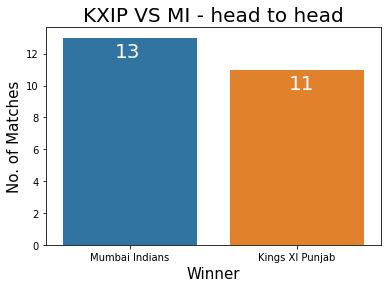

In [27]:
sns.countplot(KM["winner"])
plt.text(-0.09,11.8,str(KM['winner'].value_counts()['Mumbai Indians']),size=20,color='white')
plt.text(0.95,9.8,str(KM['winner'].value_counts()['Kings XI Punjab']),size=20,color='white')
plt.xlabel('Winner',fontsize=15)
plt.ylabel('No. of Matches',fontsize=15)
plt.title('KXIP VS MI - head to head',fontsize = 20)

In [64]:
Season_wise_Match_Winner = pd.DataFrame(KM.groupby(["season","winner"])["winner"].count())
print("Season wise winner of matches between KXIP and MI :")
Season_wise_Match_Winner

Season wise winner of matches between KXIP and MI :


winner
season winner                 
2008   Kings XI Punjab       2
2009   Kings XI Punjab       1
       Mumbai Indians        1
2010   Kings XI Punjab       1
       Mumbai Indians        1
2011   Kings XI Punjab       1
       Mumbai Indians        1
2012   Kings XI Punjab       1
       Mumbai Indians        1
2013   Kings XI Punjab       1
       Mumbai Indians        1
2014   Mumbai Indians        2
2015   Kings XI Punjab       1
       Mumbai Indians        1
2016   Kings XI Punjab       1
       Mumbai Indians        1
2017   Kings XI Punjab       1
       Mumbai Indians        1
2018   Mumbai Indians        2
2019   Kings XI Punjab       1
       Mumbai Indians        1

### Winning Percentage

In [69]:
Winning_Percentage = KM['winner'].value_counts()/len(KM['winner'])

In [70]:
print(" MI winning percentage against KXIP(overall) : {}%".format(int(round(Winning_Percentage[0]*100))))
print("KXIP winning percentage against MI(overall) : {}%".format(int(round(Winning_Percentage[1]*100))))

 MI winning percentage against KXIP(overall) : 54%
KXIP winning percentage against MI(overall) : 46%


### Performance Based Analysis

In [33]:
def performance( team_name , given_df ):
    for value in given_df.groupby('winner'):
        if value[0] == team_name:

            total_win_by_runs = sum(list(value[1]['win_by_runs']))
            total_win_by_wickets = sum(list(value[1]['win_by_wickets']))
            
            if 0 in list(value[1]['win_by_runs'].value_counts().index):
                x = value[1]['win_by_runs'].value_counts()[0]
            else:
                x = 0
                
            if 0 in list(value[1]['win_by_wickets'].value_counts().index):
                y = value[1]['win_by_wickets'].value_counts()[0]
            else:
                y = 0
                
            number_of_times_given_team_win_while_defending = (len(value[1]) - x )
            number_of_times_given_team_win_while_chasing = (len(value[1]) - y )
            
            average_runs_by_which_a_given_team_wins_while_defending = total_win_by_runs / number_of_times_given_team_win_while_defending
            average_wickets_by_which_a_given_team_wins_while_chasing = total_win_by_wickets / number_of_times_given_team_win_while_chasing
            
            print('Number of times given team win while defending :' , number_of_times_given_team_win_while_defending ) 
            print('Number of times given team win while chasing   :' , number_of_times_given_team_win_while_chasing )
            print()
            print('Average runs by which a given team wins while defending  : ' ,round(average_runs_by_which_a_given_team_wins_while_defending))
            print('Average wickets by which a given team wins while chasing : ' ,round(average_wickets_by_which_a_given_team_wins_while_chasing))

In [35]:
performance("Mumbai Indians",KM)

Number of times given team win while defending : 5
Number of times given team win while chasing   : 8

Average runs by which a given team wins while defending  :  16.0
Average wickets by which a given team wins while chasing :  6.0


In [36]:
performance("Kings XI Punjab",KM)

Number of times given team win while defending : 7
Number of times given team win while chasing   : 4

Average runs by which a given team wins while defending  :  32.0
Average wickets by which a given team wins while chasing :  7.0


## Toss Analysis

In [38]:
Toss_Decision = pd.DataFrame(KM.groupby(['toss_winner',"toss_decision"])["toss_decision"].count())

print ("Toss winner decision :")
Toss_Decision 

Toss winner decision :


toss_decision
toss_winner     toss_decision               
Kings XI Punjab bat                        4
                field                      4
Mumbai Indians  bat                        5
                field                     11

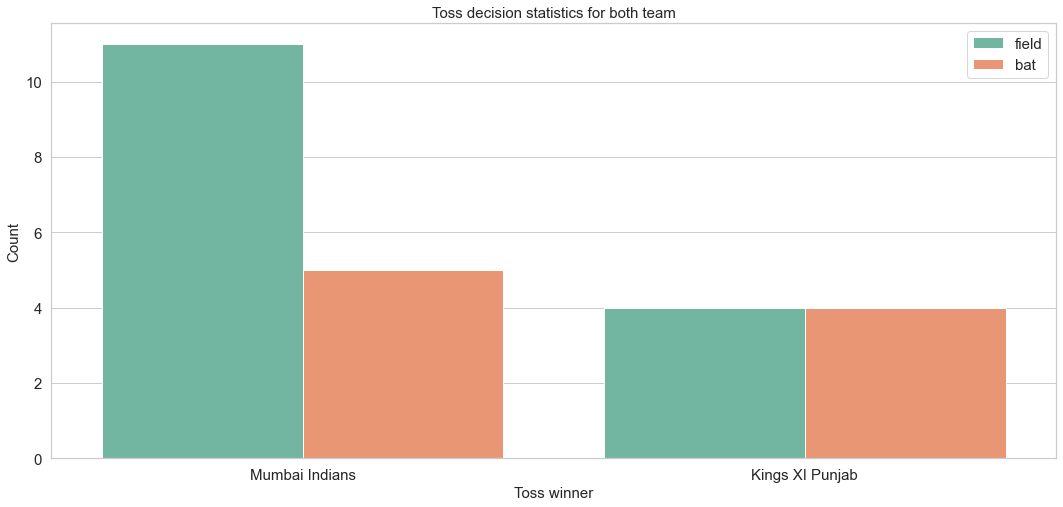

In [39]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,8))
sns.countplot(KM['toss_winner'],palette='Set2',hue=KM['toss_decision'])
plt.title('Toss decision statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.show()

In [37]:
Toss_Decision_based_Winner = pd.DataFrame(KM.groupby(['toss_winner',"toss_decision","winner"])["winner"].count())

print(" No of times toss winning decision leading to match winning : ")
Toss_Decision_based_Winner

 No of times toss winning decision leading to match winning : 


winner
toss_winner     toss_decision winner                 
Kings XI Punjab bat           Kings XI Punjab       1
                              Mumbai Indians        3
                field         Kings XI Punjab       1
                              Mumbai Indians        3
Mumbai Indians  bat           Kings XI Punjab       3
                              Mumbai Indians        2
                field         Kings XI Punjab       6
                              Mumbai Indians        5

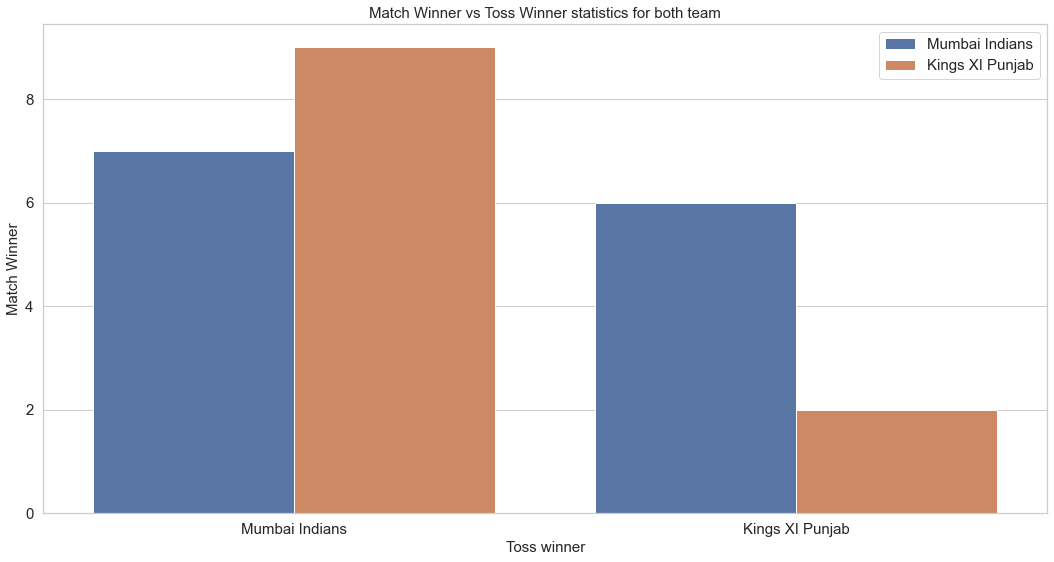

In [40]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(KM['toss_winner'],hue=KM['winner'])
plt.title('Match Winner vs Toss Winner statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc="best",fontsize=15)

From the above analysis we can see a reverse pattern which we saw earlier also in few matches . Though it's not a full proof conclusion but we can see a pattern that when toss is won by MI majority matches went in favour of KXIP and same opposite happened when toss is won by KXIP , major matches are won by MI.

#### Toss Decision based Analysis of both the teams seperately :

In [71]:
KXIP = KM[KM["toss_winner"]=="Kings XI Punjab"]
MI = KM[KM["toss_winner"]=="Mumbai Indians"]

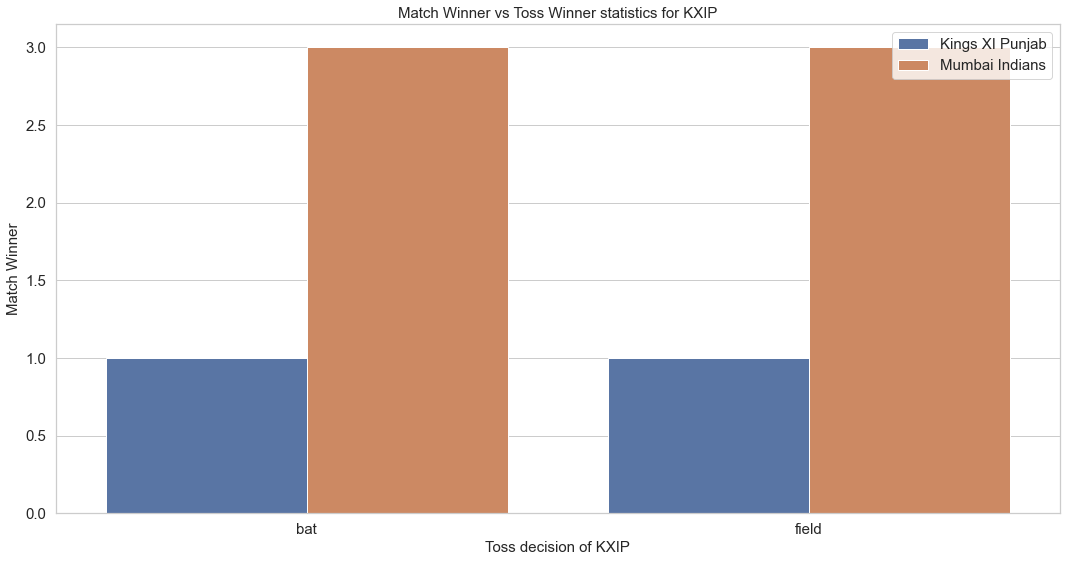

In [72]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(KXIP['toss_decision'],hue=KXIP['winner'])
plt.title('Match Winner vs Toss Winner statistics for KXIP',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss decision of KXIP',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc=1,fontsize=15)

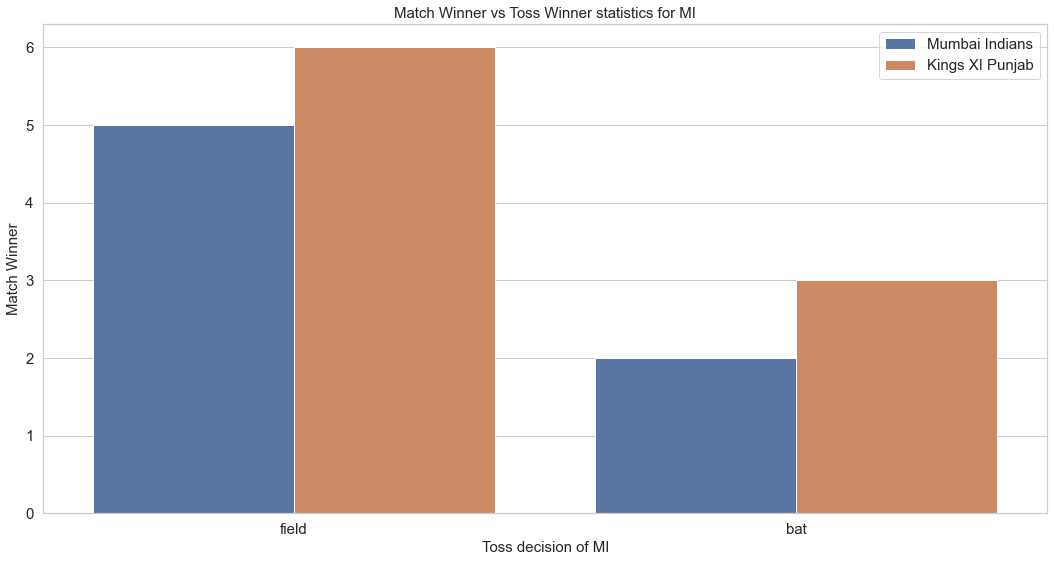

In [73]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(MI['toss_decision'],hue=MI['winner'])
plt.title('Match Winner vs Toss Winner statistics for MI',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss decision of MI',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc=1,fontsize=15)

In [74]:
player_of_the_match = pd.DataFrame(KM.player_of_match.value_counts())

print("Man of the match :")

player_of_the_match

Man of the match :


,player_of_match
KC Sangakkara,3
LMP Simmons,2
KA Pollard,2
SE Marsh,2
BA Bhatt,1
AS Yadav,1
CJ Anderson,1
AT Rayudu,1
Harbhajan Singh,1
MA Agarwal,1


## Recent Year Performance Analysis

In [46]:
cond1 = KM["season"] == 2015
cond2 = KM["season"] == 2016
cond3 = KM["season"] == 2017
cond4 = KM["season"] == 2018
cond5 = KM["season"] == 2019
final = KM[cond1 | cond2 | cond3 | cond4 | cond5]
final

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
22,2017,Indore,2017-04-20,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,JC Buttler,Holkar Cricket Stadium
50,2017,Mumbai,2017-05-11,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,7,0,WP Saha,Wankhede Stadium
524,2015,Mumbai,2015-04-12,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,18,0,GJ Bailey,Wankhede Stadium
552,2015,Chandigarh,2015-05-03,Mumbai Indians,Kings XI Punjab,Mumbai Indians,bat,normal,0,Mumbai Indians,23,0,LMP Simmons,"Punjab Cricket Association Stadium, Mohali"
597,2016,Chandigarh,2016-04-25,Mumbai Indians,Kings XI Punjab,Kings XI Punjab,field,normal,0,Mumbai Indians,25,0,PA Patel,"Punjab Cricket Association IS Bindra Stadium, ..."
619,2016,Visakhapatnam,2016-05-13,Mumbai Indians,Kings XI Punjab,Mumbai Indians,bat,normal,0,Kings XI Punjab,0,7,MP Stoinis,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...
7927,2018,Indore,04/05/18,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,6,AS Yadav,Holkar Cricket Stadium
7943,2018,Mumbai,16/05/18,Mumbai Indians,Kings XI Punjab,Kings XI Punjab,field,normal,0,Mumbai Indians,3,0,JJ Bumrah,Wankhede Stadium
11145,2019,Mohali,30/03/19,Mumbai Indians,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,8,MA Agarwal,IS Bindra Stadium


In [47]:
final.shape

(10, 14)

In [48]:
player = pd.DataFrame(final.player_of_match.value_counts())

print("Man of the match :")
player

Man of the match :


,player_of_match
GJ Bailey,1
MA Agarwal,1
PA Patel,1
JJ Bumrah,1
JC Buttler,1
WP Saha,1
MP Stoinis,1
LMP Simmons,1
AS Yadav,1
KA Pollard,1


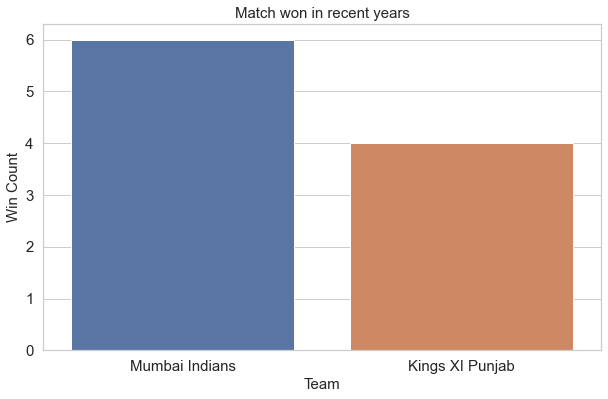

In [49]:
plt.figure(figsize = (10,6))
sns.countplot(final['winner'])
plt.title('Match won in recent years',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Team',fontsize=15)
plt.ylabel('Win Count',fontsize=15)
#plt.legend(loc=1,fontsize=15)

plt.show()

From all the above analysis related to head to head , toss decision , toss winner to match winner ratio , reverse pattern which we observed etc we can predict that MI will be favorite for this match but taking in consideration toss based winning difference for both the teams also i.e. KXIP has better records when defending the score and similarly MI has better records while chasing the score, this is contradictory in itself.

Based on all this observation and analysis we can predict KXIP can have better chance to win if they chase the score and same for MI also if they chase the score.

